# **BUSINESS UNDERSTANDING**

In facing the COVID-19 pandemic, a deep understanding of data is a very valuable asset for various parties, including the government, health institutions and the general public. Data analysis on the Indonesian COVID-19 dataset aims to provide better insight into this pandemic, as well as assist in making effective decisions in dealing with the public health crisis. The COVID-19 dataset in Indonesia is arranged based on time series, national level and provincial level. , also accompanied by demographic data from that location/region. This dataset is a compilation of various open data sources, such as the official government website of the COVID-19 Task Force, the Central Statistics Agency, and the InaCOVID-19 Hub.

By utilizing this dataset, several important things that can be explored are:
1. On what date was the highest number of new COVID 19 cases reported in one day?
2. Which province had the highest number of new cases per day?
3. Which island had the highest number of COVID 19 cases per day?
4. Which province had the highest number of new cases per day? highest daily healing?
5. How Correlates Between New Deaths and New Recovery?

# **DATA UNDERSTANDING**

- COVID-19 data in Indonesia from March 1 2020 - September 16 2022. The dataset consists of 31,822 rows and 38 columns.
- Data source : https://www.kaggle.com/datasets/hendratno/covid19-indonesia
- Data dictionary :
1. 'Date' : Date reported
2. 'Location ISO Code' : Location code based on ISO standard
3. 'Location' : Location name
4. 'New Cases' : Daily positive cases
5. 'New Deaths' : Daily death cases
6. 'New Daily Recovered' : Daily cure cases
7. 'New Active Cases': Daily active cases
8. 'Total Cases': The accumulative number of positive cases up to the associated time
9. 'Total Deaths': The cumulative number of deaths up to the associated time
10. ‘Total Recovered': The cumulative number of cured cases up to the associated time
11. 'Total Active Cases': The cumulative number of active cases up to the associated time
12. 'Location Level': Regional or national location level
13. ‘City or Regency': Name of city or region
14. 'Province' : Name of the province of location
15. 'Country' : Country name of location
16. 'Island' : Name of the main island location
17. 'Time Zone' : Time zone location
18. 'Special Status' : Special status of location
19. 'Total Regencies' : The number of districts within the associated location
20. 'Total Cities' : Number of cities within the associated location
21. 'Total Districts' : Number of subdistricts within the corresponding location
22. 'Total Urban Village' : The number of villages within the associated location
23. 'Total Rural Villages' : Number of villages within the associated location
24. 'Area (km  )' : Area of location in square kilometers
25. 'Population' : The number of populations within a related location
26. 'Population Density' : The population density in a related location (formula = Population / Area)
27. 'Longitude' : Longitude of location
28. 'Latitude' : The latitude of the location
29. 'New Cases per Million' : Formula = (New Cases / Population) x 1,000,000
30. 'Total Cases per Million' : Formula = (Total Cases / Population) x 1,000,000
31. 'Total Deaths per Million' : Formula = (Total Deaths / Population) x 1,000,000
32. 'Case Fatality Rate' : Formula = (Total Deaths / Total Cases) x 100
33. 'Case Recovered Rate' : Formula = (Total Recovered / Total Cases) x 100
34. 'Growth Factor of New Cases': Less than 1 means decreased, 1 means none change, more than 1 means increase (formula = Today New Cases / Yesterday New Cases)
35. 'Growth Factor of New Deaths': Less than 1 means decreased, 1 means none change, more than 1 means increase (formula = Today New Deaths / Yesterday New Deaths)

# **DATA PREPARATION**

Python Version: 3.11.6
Packages:
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Feature Engine

In [1]:
pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 544.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 500.5 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 482.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 455.1 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 479.2 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 474.7 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 491.5 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 520.4 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existin

### Import Packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [33]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

### Preview Dataset

In [34]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


### Info Dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [36]:
df.shape

(31822, 38)

# **DATA CLEANSING**

#### Know the characteristics of the data by checking the amount of NULL data in each column

In [37]:
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

It appears that several columns in the dataset contain NULL values. In the "City or Regency" column, there are 31,822 NULL values, indicating that information about the city or regency is not available for those entries. The same applies to the columns "Province," "Island," "Time Zone," "Special Status," "Total Cities," "Total Urban Villages," "Total Rural Villages," "Growth Factor of New Cases," and "Growth Factor of New Deaths." After understanding the contents of the data by reading the description of each column, we can determine which columns are not crucial and should be dropped.

#### Drop unneeded columns

The columns to be dropped are 'Location ISO Code', 'City or Regency', 'Country', 'Continent', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Regencies', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Growth Factor of New Cases', and 'Growth Factor of New Deaths'.

In [38]:
df.drop(['Location ISO Code', 'City or Regency', 'Country', 'Continent', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Regencies', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Growth Factor of New Cases', 'Growth Factor of New Deaths'], axis=1, inplace=True)

#### Changed the "Date" data type to a datetime data type to avoid errors in time-series sorting in visualizations

In [39]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

#### Latest Dataset Preview

In [40]:
df.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Island,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,51.28%,192.31%
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,48.78%,182.93%
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,265185520,138.34,113.921327,-0.789275,0.00,0.00%,0.00%
3,2020-03-02,Riau,1,0,0,1,1,0,1,0,Province,Riau,Sumatera,6074100,69.80,101.805109,0.511648,0.00,0.00%,100.00%
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,46.51%,174.42%


#### Latest Dataset Info

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    31822 non-null  datetime64[ns]
 1   Location                31822 non-null  object        
 2   New Cases               31822 non-null  int64         
 3   New Deaths              31822 non-null  int64         
 4   New Recovered           31822 non-null  int64         
 5   New Active Cases        31822 non-null  int64         
 6   Total Cases             31822 non-null  int64         
 7   Total Deaths            31822 non-null  int64         
 8   Total Recovered         31822 non-null  int64         
 9   Total Active Cases      31822 non-null  int64         
 10  Location Level          31822 non-null  object        
 11  Province                30893 non-null  object        
 12  Island                  30893 non-null  object

# **EXPLORATORY DATA ANALYSIS (EDA)**

## Question 1 : On what date was the highest number of new COVID 19 cases reported in a single day?

**1.1** Filter data by the 'New Cases' column, then display the 8 data with the highest number of new COVID 19 cases reported in one day and their dates ('Date' column). Then display the 'Location' column to show that the number of 'New Cases' is accumulative not from one location alone (accumulative from all regions in Indonesia as of the relevant date).

In [42]:
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]
top_8_date_new_cases

,Date,New Cases,Location
0,2022-02-16,64718,Indonesia
1,2022-02-17,63956,Indonesia
2,2022-02-23,61488,Indonesia
3,2022-02-18,59635,Indonesia
4,2022-02-19,59384,Indonesia
5,2022-02-22,57491,Indonesia
6,2022-02-24,57426,Indonesia
7,2022-02-15,57049,Indonesia


**1.2** Visualization of the increase in 'New Cases' based on the order of 8 dates with the most COVID 19 cases per day

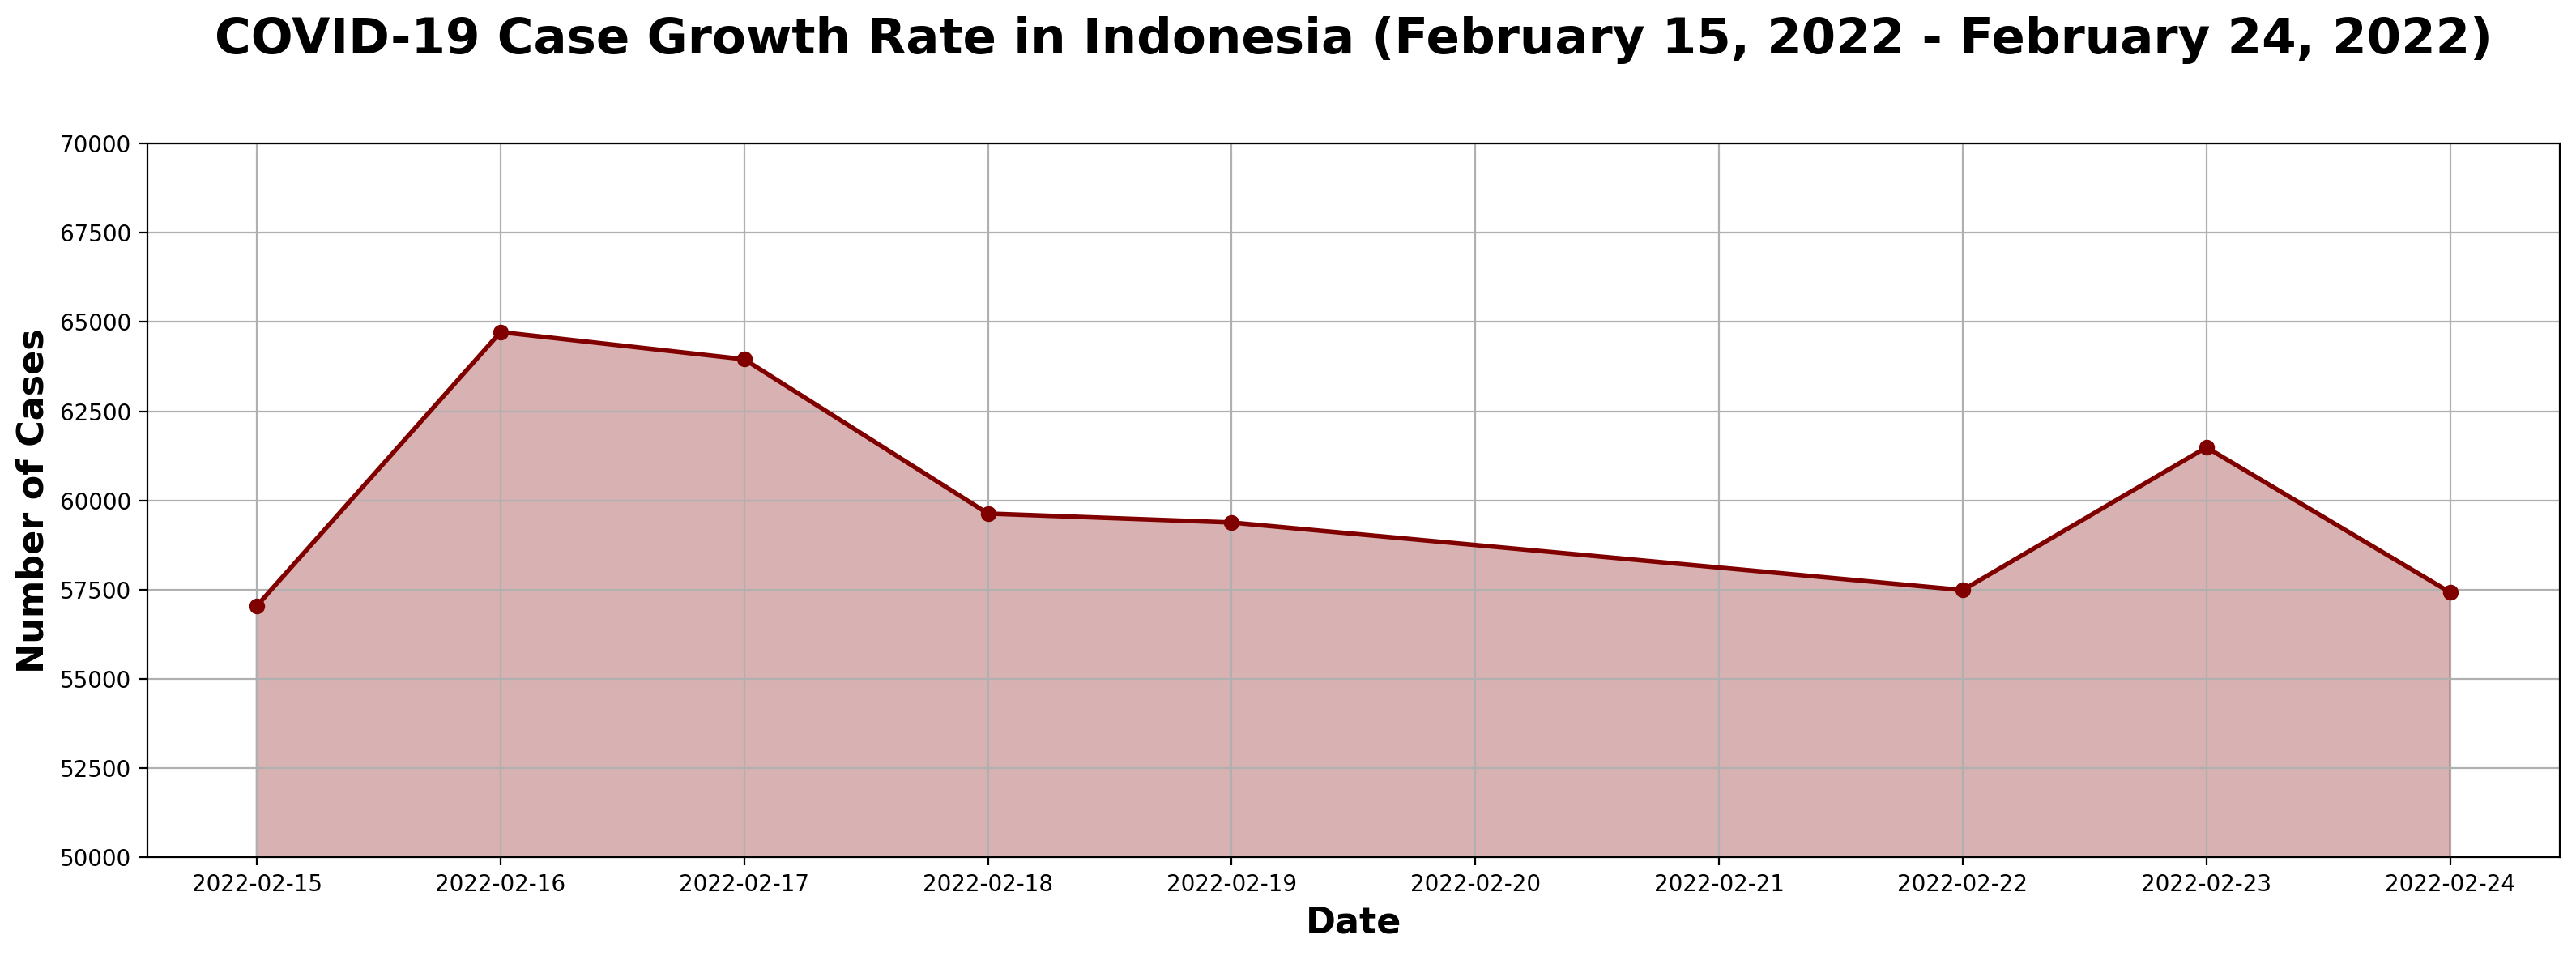

In [43]:
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]

x1_2 = list(top_8_date_new_cases.sort_values(by='Date')['Date'])
y1_2 = list(top_8_date_new_cases.sort_values(by='Date')['New Cases'])

# Visualizing with an area chart
plt.figure(figsize=(16, 6), dpi=200)
plt.fill_between(x1_2, y1_2, color='maroon', alpha=0.3)  # Area chart with maroon color and 0.3 opacity
plt.plot(x1_2, y1_2, color='maroon', marker='o', linestyle='-', linewidth=2)  # Line plot for detailed data
plt.ylim(ymin=50000, ymax=70000)
plt.title('COVID-19 Case Growth Rate in Indonesia (February 15, 2022 - February 24, 2022)', fontsize=22, fontweight='bold', pad=40)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Number of Cases', fontsize=16, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the visualization above, it can be observed that the growth in cases began around mid-February 2022, specifically on February 15th. There was a significant spike on February 16th, 2022, where the highest number of new COVID-19 cases in a single day was recorded, totaling **64,718** cases. Subsequently, there was a decline from February 17th to February 22nd, followed by an increase again on February 23rd. Then, on February 24th, the number of cases decreased once more.

From the table and visualization data above, it is evident that the top 8 dates with the highest number of COVID-19 cases per day are in February 2022.

## Question 2 : Which province has the highest number of new cases per day?

**2.1** Ranks the 5 provinces with the most COVID 19 cases found per day by filtering data from the **New Cases** column and then displaying their provinces (**Province** column).

In [44]:
df_not_ll = df.loc[df['Location Level'] == 'Province'].sort_values(by='New Cases', ascending=False)[['Province', 'New Cases']]
df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]

,New Cases
Province,
DKI Jakarta,1412474
Jawa Barat,1173731
Jawa Tengah,636409
Jawa Timur,601534
Banten,333875


**2.2** Visualization of comparison between provinces with the highest total COVID 19 case findings per day

In [45]:
a22 = df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]
x2_2 = list(a22.to_dict()['New Cases'].keys())
y2_2 = list(a22.to_dict()['New Cases'].values())

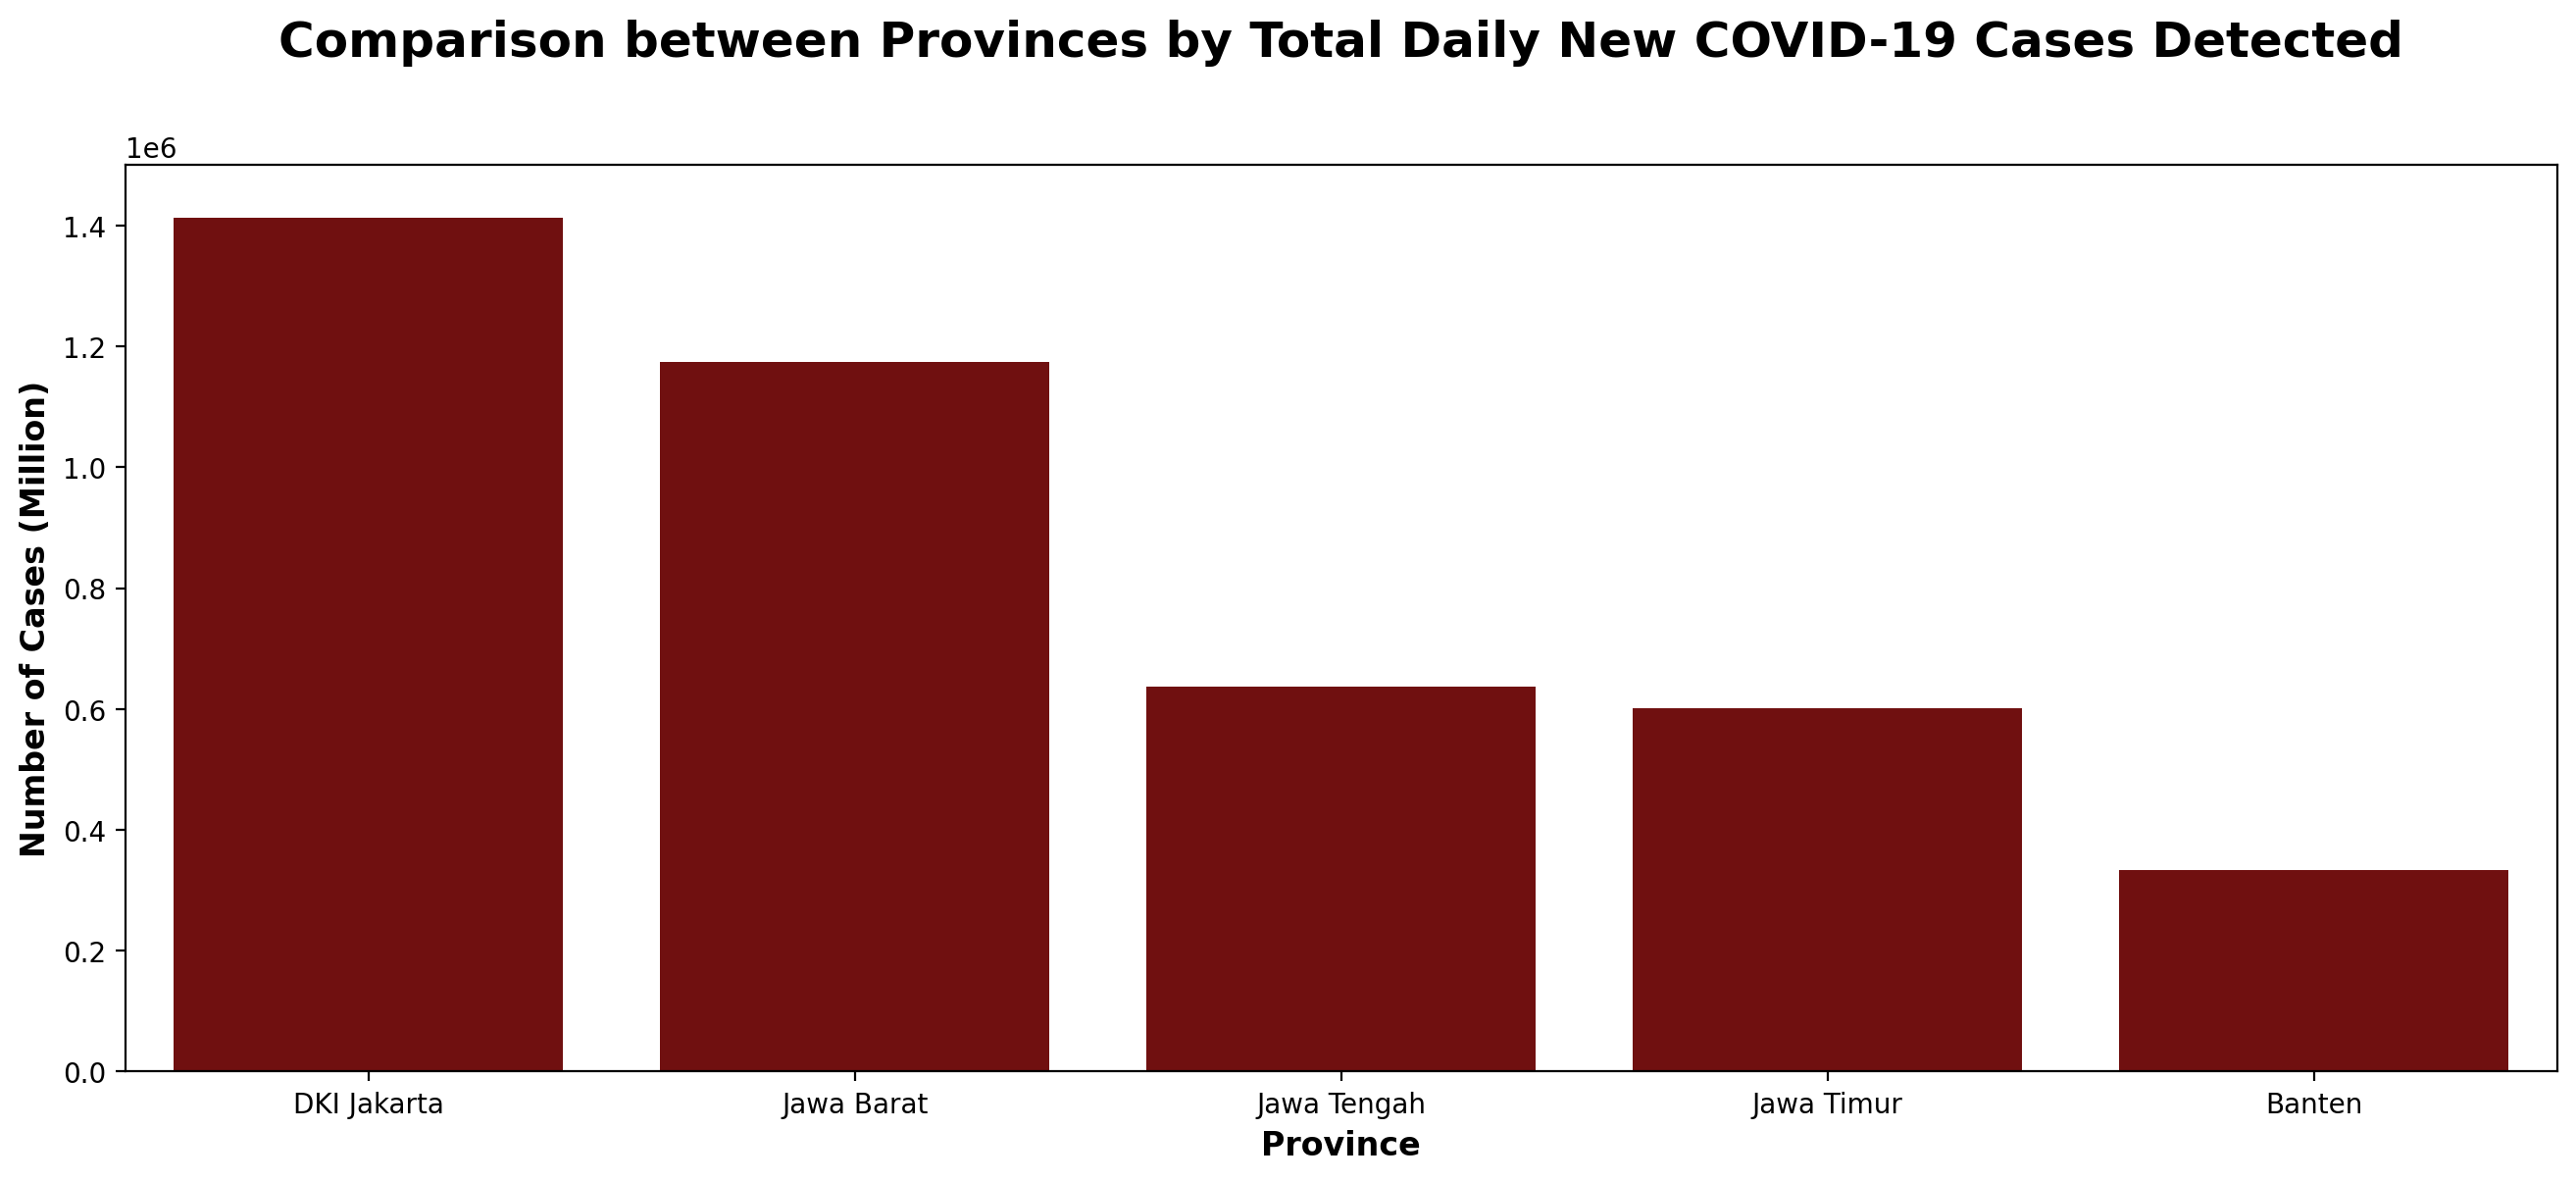

In [46]:
plt.style.use('default')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.barplot(x=x2_2, y=y2_2, color='maroon')
plt.ylim(ymax=1500000)
plt.title('Comparison between Provinces by Total Daily New COVID-19 Cases Detected', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Province', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cases (Million)', fontsize=12, fontweight='bold')
plt.show()

Based on the visualization above, it can be seen that DKI Jakarta Province has the highest total cases per day of 1,412,474 cases, followed by the Provinces of West Java, Central Java, East Java, and Banten.

## Question 3 : Which island has the highest number of COVID 19 cases per day?

**3.1** See the islands with the highest number of cases per day by filtering data from the **New Cases** column, then displaying the name of the island (**Island column).

In [47]:
top_islands_new_cases = df.loc[df.Island != None].groupby(['Island'])[['New Cases']].sum().sort_values(by='New Cases', ascending=False)
top_islands_new_cases

,New Cases
Island,
Jawa,4382330
Sumatera,822718
Kalimantan,465732
Sulawesi,313608
Nusa Tenggara,297493
Papua,82097
Maluku,33331


**3.2** Visualization of the comparison of each island with the most total cases per day

In [48]:
x3_2 = list(top_islands_new_cases.to_dict()['New Cases'].keys())
y3_2 = list(top_islands_new_cases.to_dict()['New Cases'].values())

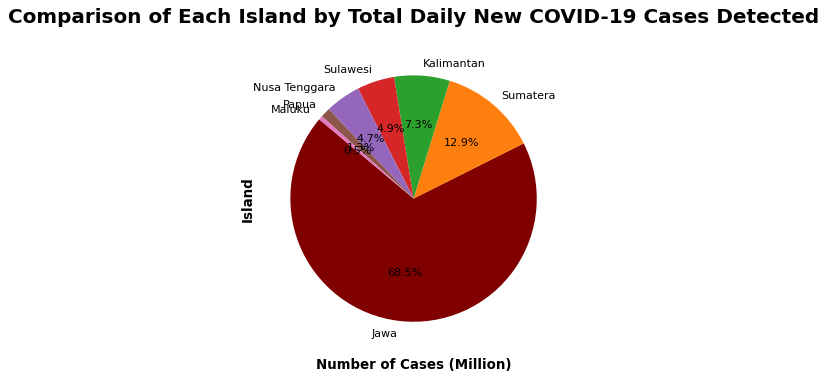

In [49]:
# Setting the visualization size
plt.figure(figsize=(9, 5), dpi=80)

# Creating a pie chart
plt.pie(y3_2, labels=x3_2, colors=['maroon', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], autopct='%1.1f%%', startangle=140)
# Adding title and axis labels
plt.title('Comparison of Each Island by Total Daily New COVID-19 Cases Detected', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Cases (Million)', fontsize=12, fontweight='bold')
plt.ylabel('Island', fontsize=12, fontweight='bold')

# Displaying the pie chart
plt.show()

Based on the visualization above, the highest number of COVID-19 cases found per day is centered on the island of Java with the number of cases penetrating up to 4 million cases per day. The comparison looks very striking when compared to the total discovery of COVID 19 cases per day on other islands. This shows that the results of the visualization above are in accordance with the previous analysis where the 5 provinces with the most total COVID-19 cases found per day are on the island of Java.

## Question 4 : Which province has the highest daily cure rate?

**4.1** Sorts provinces with the highest cure rate per day by filtering data from the **New Recovered** column, then displaying the name of the province (**Province** column)

In [50]:
top_province_new_rcvry = df.loc[df['Location Level'] == 'Province'].groupby(['Province'])[['New Recovered']].sum().sort_values(by='New Recovered', ascending=False)
top_province_new_rcvry[:10]

,New Recovered
Province,
DKI Jakarta,1386059
Jawa Barat,1144298
Jawa Tengah,601506
Jawa Timur,568666
Banten,328372
Daerah Istimewa Yogyakarta,217710
Kalimantan Timur,203019
Bali,161626
Sumatera Utara,154914


**4.2** Visualization of the comparison of provinces with the highest cure rates per day

In [51]:
x4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].keys())
y4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].values())

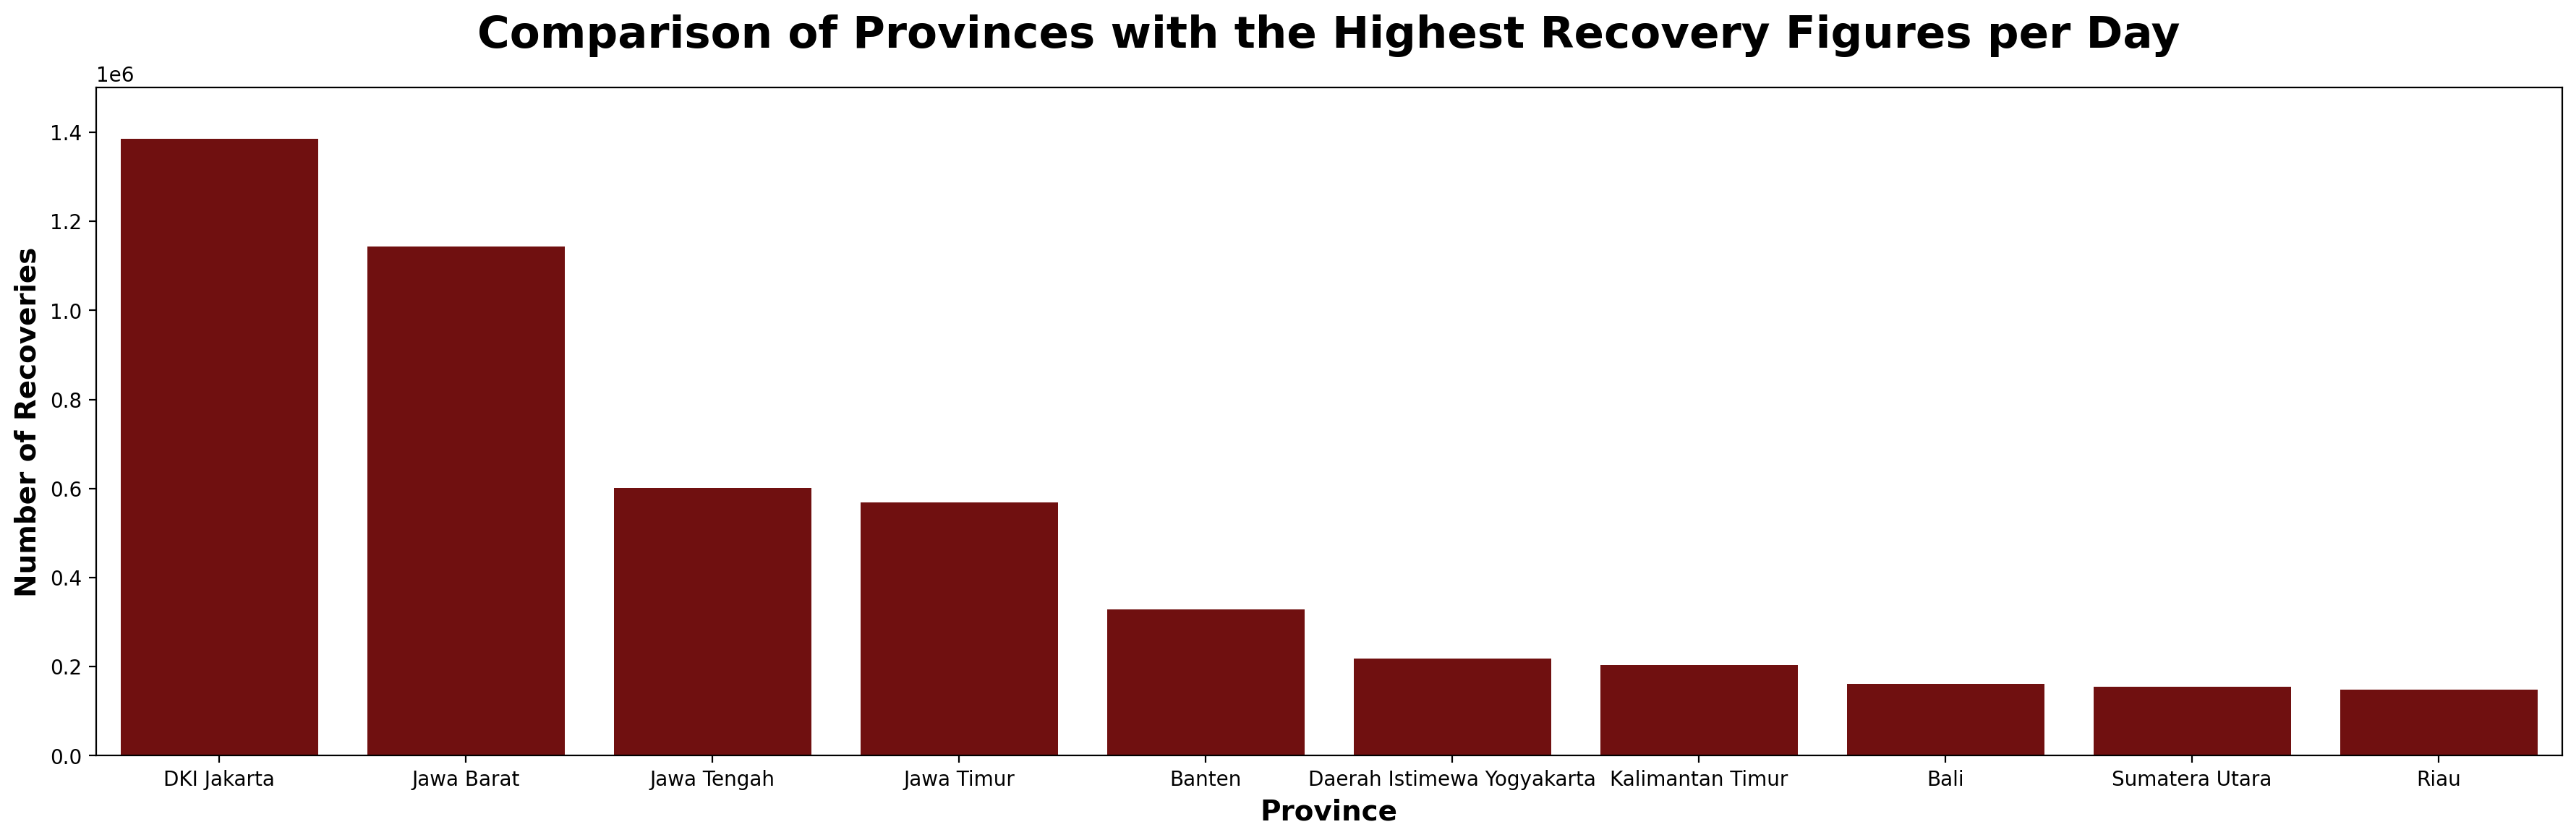

In [52]:
plt.style.use('default')
fg, ax = plt.subplots(figsize=(22,6), dpi=200)
sns.barplot(x=x4_2, y=y4_2, color='#800000')
plt.title('Comparison of Provinces with the Highest Recovery Figures per Day', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Province', fontsize=14, fontweight='bold')
plt.ylabel('Number of Recoveries', fontsize=14, fontweight='bold')
plt.ylim(ymax=1500000)
plt.show()

Based on the visualization above, it can be seen that DKI Jakarta province excels in the daily recovery rate of **1,386,059**, which is almost nine times that of Riau province which occupies the bottom position in the number of COVID 19 cases recovered per day which is 147,972.

## Question 5 : How Correlates Between New Deaths and New Recovery?

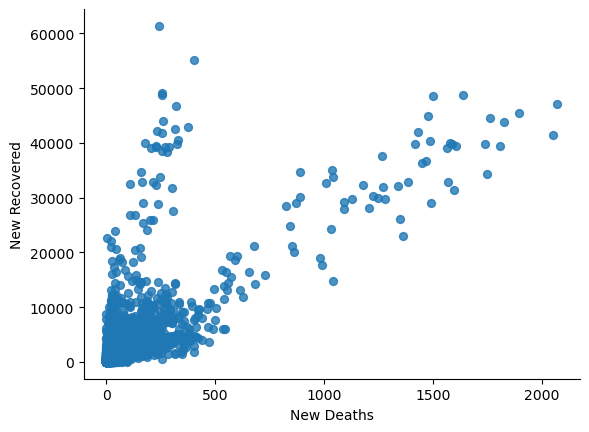

In [53]:
# @title New Deaths vs New Recovered

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='New Deaths', y='New Recovered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The graph represents data related to a disease, namely COVID-19, and shows how these two variables are related to each other. Scattered blue dots show daily data. In the lower left corner, there are many points with low numbers of deaths and recoveries. However, the more new deaths, the more new recoveries. so it can be concluded that there is a positive correlation between death and recovery. As the outbreak spreads, both deaths and recoveries increase. However, variability remains, and further action is needed to manage this outbreak.